# **Library & Dataset**

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Clicked Ads Dataset.csv to Clicked Ads Dataset.csv


In [6]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


Setiap baris menunjukan satu customer

# **Create UDFs**

In [7]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)

    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()

    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]

    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)

        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)

    return result

# **Install ppscore**

In [8]:
# You need to install library ppscore to calculate correlation between variable
#!pip install ppscore

# **Tugas 1**

### **Univariate Analysis**

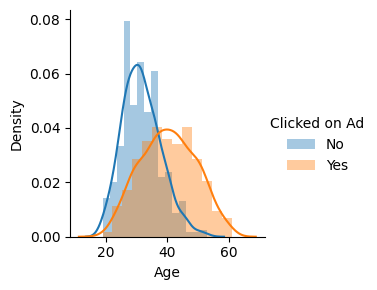

In [9]:
sns.FacetGrid(df,hue="Clicked on Ad").map(sns.distplot,"Age").add_legend()
plt.show()

**Kesimpulan:** Dari Grafik diatas dapat diketahui bahwa Orang-orang yang berumur lebih cenderung mengklik iklan daripada anak muda, hal ini mungkin disebabkan karena anak muda lebih berhati-hati dalam mengklik iklan.

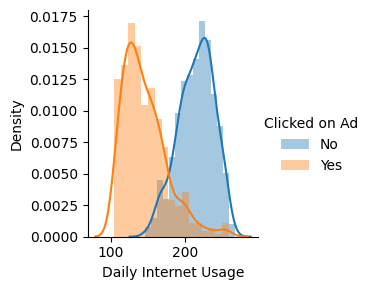

In [10]:
sns.FacetGrid(df,hue="Clicked on Ad").map(sns.distplot,"Daily Internet Usage").add_legend()
plt.show()

**Kesimpulan:** Orang-orang yang sedikit menghabiskan waktu di internet ternyata punya kecenderungan untuk mengklik iklan daripada orang yang menghabiskan banyak waktu di internet.

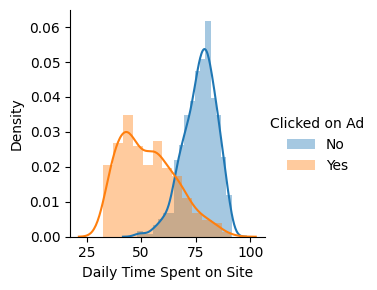

In [11]:
sns.FacetGrid(df,hue="Clicked on Ad").map(sns.distplot,"Daily Time Spent on Site").add_legend()
plt.show()

**Kesimpulan:** Orang-orang yang sedikit menghabiskan waktu di Situs Perusahaan ternyata punya kecenderungan untuk mengklik iklan daripada orang yang menghabiskan banyak waktu di Situs Perusahaan. Hal ini disebabkan karena orang yang menghabiskan banyak waktu di situs perusahaan biasanya adalah orang-orang yang mengunjungi situs dengan langsung bukan dengan mengklik iklan, sehingga persentase dia mengklik iklan memang pasti lebih sedikit.

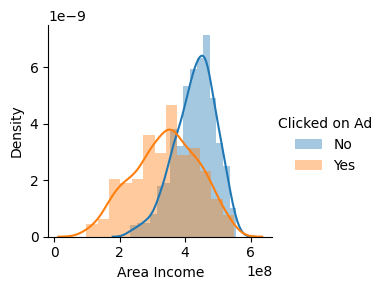

In [12]:
sns.FacetGrid(df,hue="Clicked on Ad").map(sns.distplot,"Area Income").add_legend()
plt.show()

**Kesimpulan:** Ada dua kelompok yaitu, orang-orang yang punya penghasilan sekitar +-450 juta setahun dan orang-orang yang punya penghasilan sekitar +-350 juta setahun. Dan untuk kelompok pertama memiliki persentase click yang lebih besar

### **Bivariate Analysis**

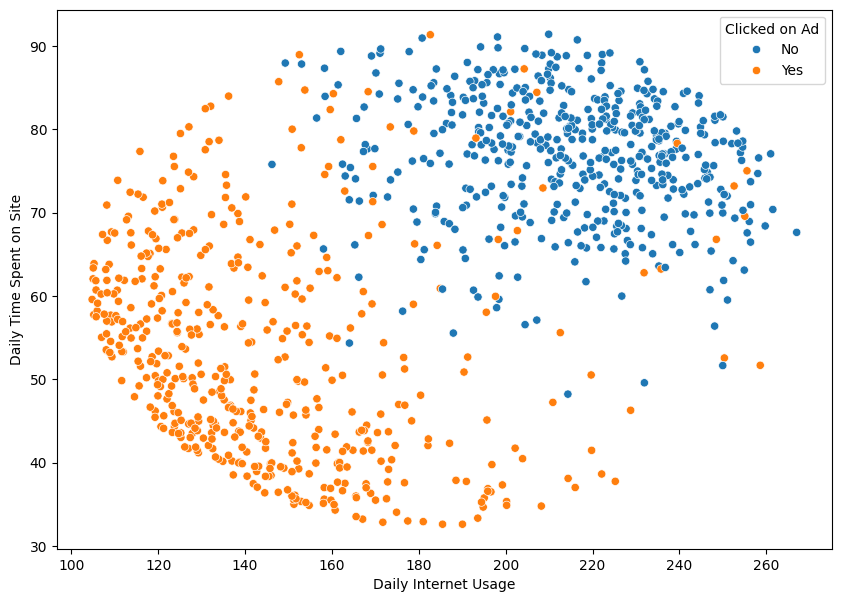

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])
plt.show()

**Kesimpulan:** Orang-orang yang masuk kategori sedikit menghabiskan waktu di internet dan sedikit menghabiskan waktu di situs perusahaan mempunyai kecenderungan untuk mengklik iklan daripada sebaliknya

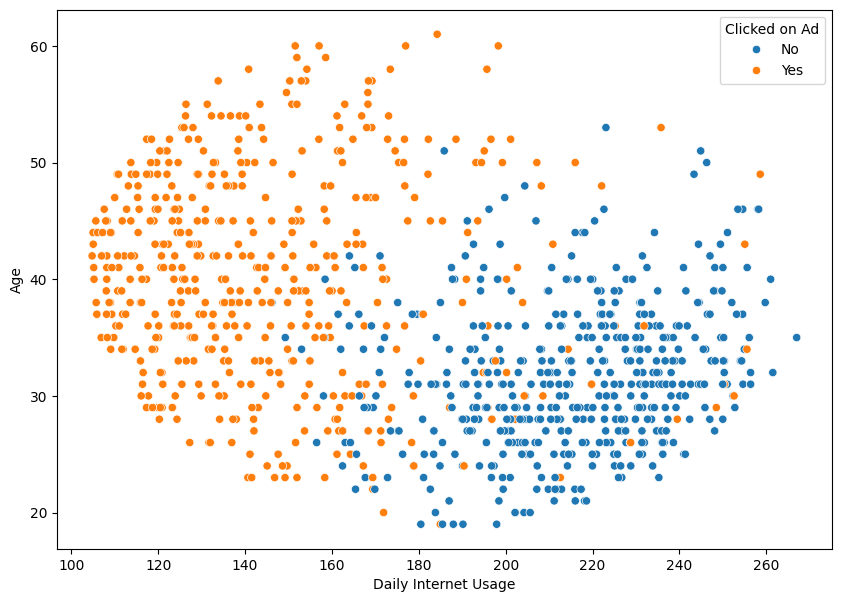

In [14]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Age'],hue=df['Clicked on Ad'])
plt.show()

**Kesimpulan:** Orang-orang yang menghabiskan sedikit waktu di internet dan punya kecenderungan untuk mengklik iklan ternyata didominasi orang yang sudah berumur (+- 40 tahun), sedangkan orang-orang yang banyak menghabiskan waktu di internet dan punya kecenderungan untuk tidak mengklik iklan ternyata didominasi oleh orang yang lebih muda (+- 30 tahun)

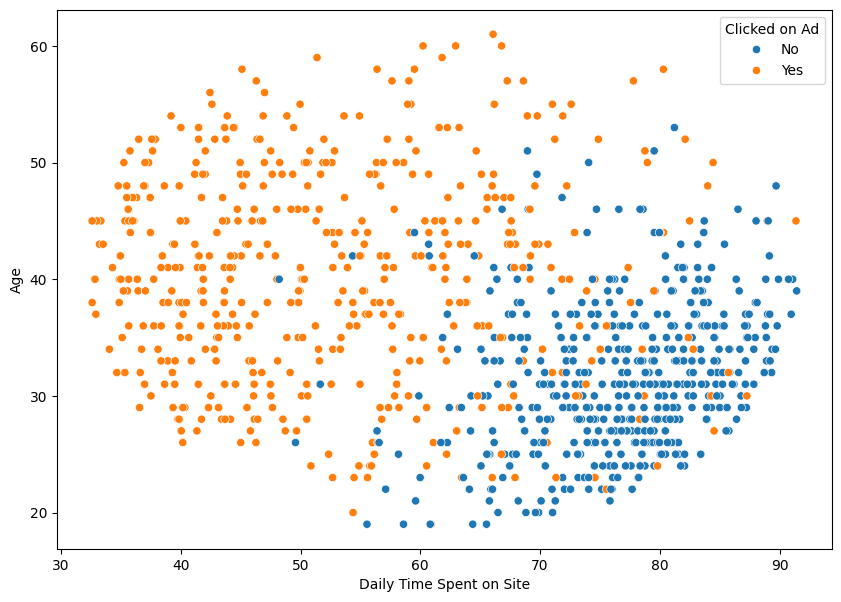

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Daily Time Spent on Site'],y=df['Age'],hue=df['Clicked on Ad'])
plt.show()

**Kesimpulan:** Orang-orang yang menghabiskan sedikit waktu di Situs Perusahaan dan punya kecenderungan untuk mengklik iklan ternyata didominasi orang yang sudah berumur (+- 40 tahun), sedangkan orang-orang yang banyak menghabiskan waktu di situs perusahaan dan punya kecenderungan untuk tidak mengklik iklan ternyata didominasi oleh orang yang lebih muda (+- 30 tahun)

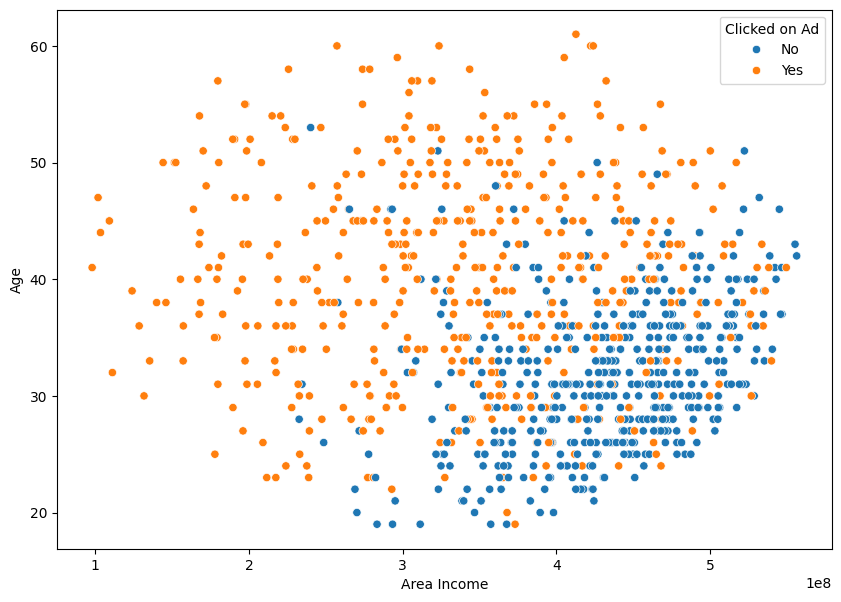

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Area Income'],y=df['Age'],hue=df['Clicked on Ad'])
plt.show()

**Kesimpulan:** Orang-orang yang incomenya +-300 juta setahun dan punya kecenderungan untuk mengklik iklan ternyata didominasi orang yang sudah berumur (+- 40 tahun), sedangkan orang-orang yang incomenya +-400 juta setahun dan punya kecenderungan untuk tidak mengklik iklan ternyata didominasi oleh orang yang lebih muda (+- 30 tahun)

### **Multivariate Analysis**

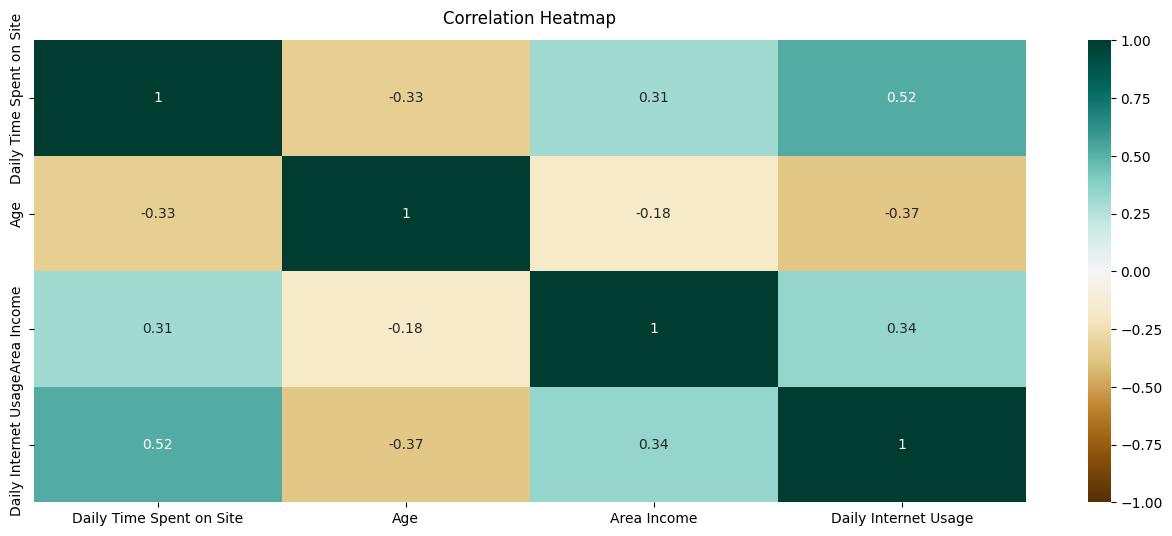

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [18]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

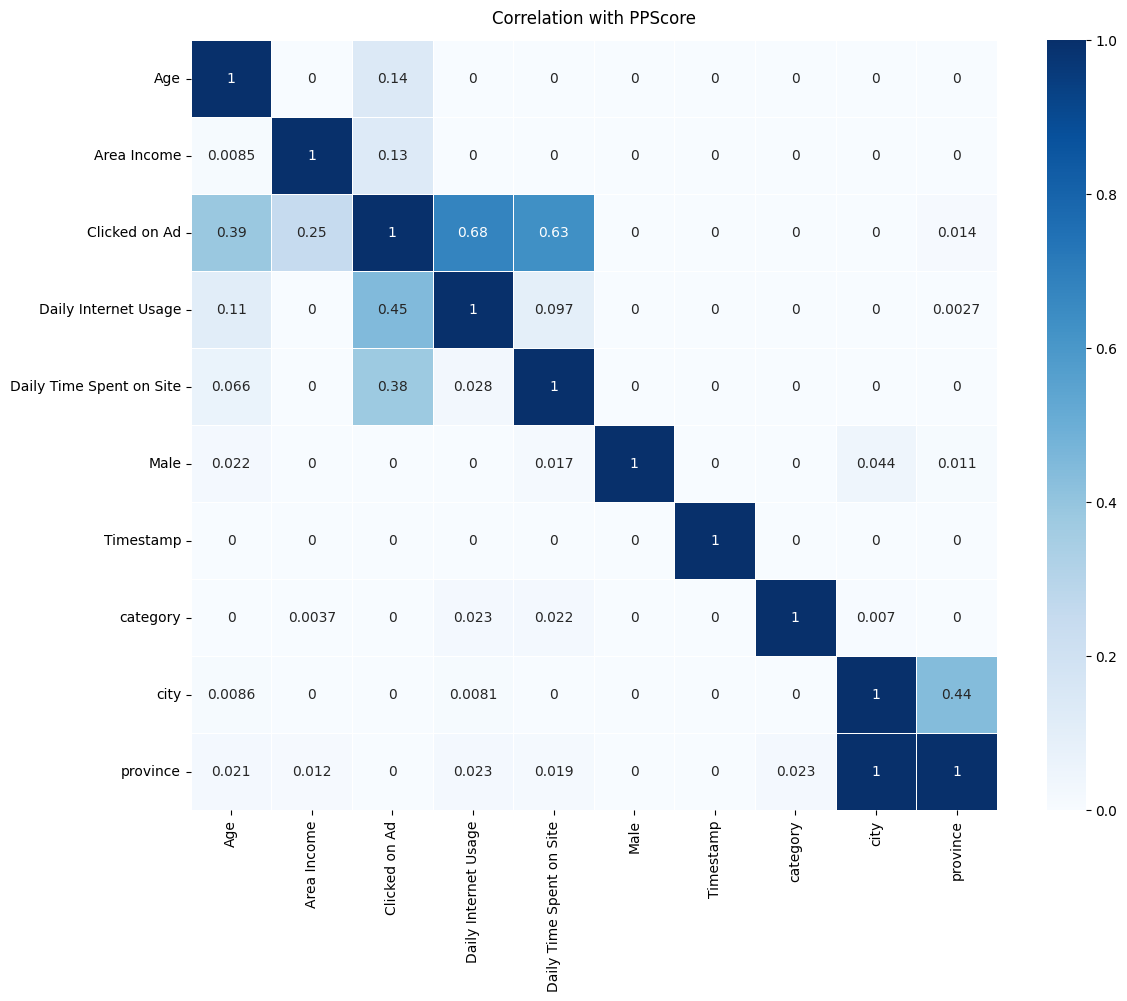

In [19]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('Correlation with PPScore', fontdict={'fontsize':12}, pad=12)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Kesimpulan:** Jika kita melihat untuk feature `Clikced on Ads` maka terdapat feature yang berkorelasi cukup kuat yaitu `Age`, `Area Income`, `Daily Internet Usage`, dan `Daily Time Spent on Site`

# **Tugas 2**

### **Data Cleaning**

In [20]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [21]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(),inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(),inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),inplace=True)
df['Male'].fillna(df['Male'].mode()[0],inplace=True)

### **Change Data Type**

In [22]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [23]:
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].astype(int)
df['Area Income'] = df['Area Income'].astype(int)
df['Daily Internet Usage'] = df['Daily Internet Usage'].astype(int)

### **Change Feature Name**

In [24]:
df = df.rename(columns={'Timestamp': 'Last Time'})

### **Feature Encoding**

In [25]:
pd.options.display.max_columns = None
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Last Time,Clicked on Ad,city,province,category
0,68,35,432837300,256,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80,31,479092950,193,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food
2,69,26,418501580,236,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic
3,74,29,383643260,245,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House
4,68,35,517229930,225,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   int64         
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   int64         
 3   Daily Internet Usage      1000 non-null   int64         
 4   Male                      1000 non-null   object        
 5   Last Time                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.2+ KB


In [27]:
df = df.rename(columns={'Male': 'Gender'})

**Label Encoding**

In [28]:
map_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1
}

In [29]:
df['Gender'] = df['Gender'].map(map_gender)

**One Hot Encoding**

In [30]:
for cat in ['city', 'province', 'category']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

### **Feature Extraction**

In [31]:
df['Month'] = pd.to_datetime(df['Last Time']).dt.month
df['Week'] = pd.to_datetime(df['Last Time']).dt.week
df['Day'] = pd.to_datetime(df['Last Time']).dt.day

In [32]:
pd.options.display.max_columns = None
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Last Time,Clicked on Ad,city,province,category,city_Balikpapan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,city_Pakanbaru,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Month,Week,Day
0,68,35,432837300,256,0,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,12,27
1,80,31,479092950,193,1,2016-04-04 01:39:00,No,Denpasar,Bali,Food,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,14,4
2,69,26,418501580,236,0,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,10,13
3,74,29,383643260,245,1,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,10
4,68,35,517229930,225,0,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6,22,3


### **Feature Selection**

In [33]:
df = df.drop(columns = ["Last Time", "city", "province", "category"])

In [34]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,city_Balikpapan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,city_Pakanbaru,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Month,Week,Day
0,68,35,432837300,256,0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,12,27
1,80,31,479092950,193,1,No,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,14,4
2,69,26,418501580,236,0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,10,13
3,74,29,383643260,245,1,No,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,10
4,68,35,517229930,225,0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6,22,3


In [35]:
df.shape

(1000, 65)

### **Split Data**

In [36]:
y = np.where(df['Clicked on Ad']=='No',0,1)
X = df.drop('Clicked on Ad', axis=1)

# **Tugas 3**

### **Train Test Split**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [38]:
print('Dimensi Train:',X_train.shape)
print('Dimensi Test:',X_test.shape)

Dimensi Train: (700, 64)
Dimensi Test: (300, 64)


### **Eksperimen Pertama: Tanpa Normalisasi Data**

In [39]:
result = experiment(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.650000,0.612245,0.652174,0.005306
1,Logistic Regression,LogisticRegression(),0.510000,0.000000,0.000000,0.017247
2,Decision Tree,DecisionTreeClassifier(),0.953333,0.965986,0.940397,0.009207
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.970000,0.972789,0.966216,0.245334
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.976667,0.979592,0.972973,0.217313


### **Eksperimen Kedua: Dengan Normalisasi Data**

**Normalisasi**

In [40]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

**Model**

In [41]:
result2 = experiment(X_train_minmax,X_test_minmax,y_train,y_test)
result2 = pd.DataFrame(result2)
result2

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.776667,0.809524,0.753165,0.001953
1,Logistic Regression,LogisticRegression(),0.966667,0.959184,0.972414,0.015318
2,Decision Tree,DecisionTreeClassifier(),0.946667,0.972789,0.922581,0.007149
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.963333,0.965986,0.959459,0.229231
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.976667,0.979592,0.972973,0.224355


### **Confusion Matrix: Dengan Normalisasi Data**

In [42]:
final_model = result2['model'][4]
y_pred = final_model.predict(X_test_minmax)

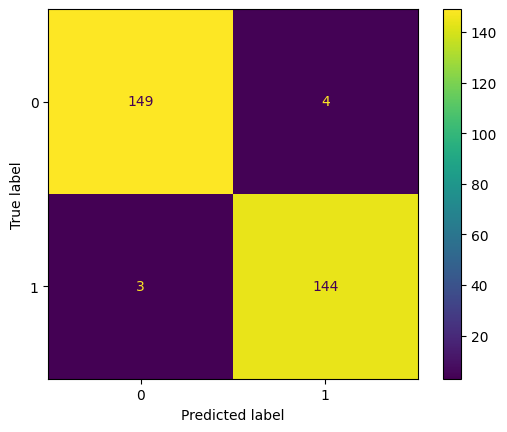

In [43]:
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)

disp.plot()
plt.show()

### **Laporan Klasifikasi: Dengan Normalisasi Data**

In [47]:
from sklearn.metrics import classification_report

In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       153
           1       0.97      0.98      0.98       147

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



### **Feature Importance: Dengan Normalisasi Data**

In [49]:
feature_imp = {}

feature_imp['columns'] = X_train.columns
feature_imp['feature_imp'] = result2['model'][4].feature_importances_

In [50]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

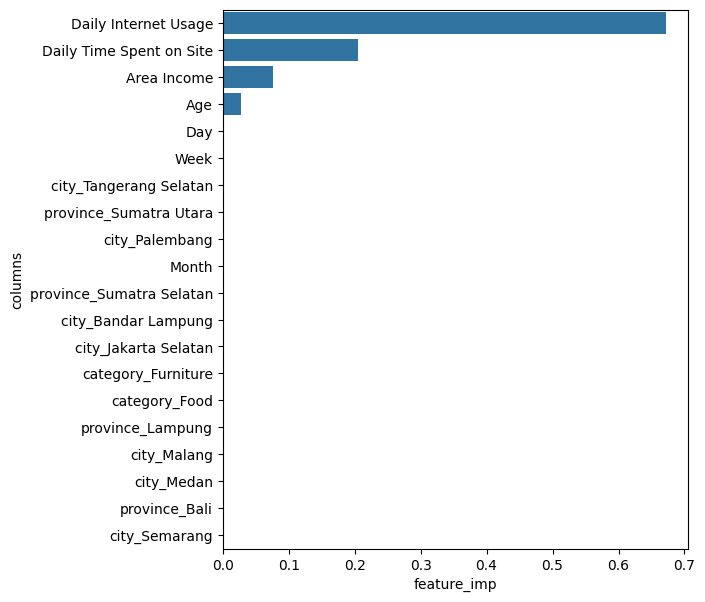

In [51]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])
plt.show()

### **Dua fitur utama: Dengan Normalisasi Data**

In [52]:
top_features = df_feature_imp.head(2)
print("Dua Fitur Utama:")
print(top_features)

Dua Fitur Utama:
                    columns  feature_imp
3      Daily Internet Usage     0.671248
0  Daily Time Spent on Site     0.204783


# **Tugas 4**

### **Rekomendasi Bisnis**

ada 2 kelompok pada dataset ini yaitu:

- Kelompok yang berumur +-30 tahun dimana mereka menghabiskan lebih banyak waktu di internet, menghabiskan lebih banyak waktu di situs perusahaan, dan mempunyai penghasilan +-400 juta setahun, dan kelompok ini adalah kelompok yang lebih sedikit mengklik iklan.
- Kelompok yang berumur +-40 tahun dimana mereka menghabiskan lebih sedikit waktu di internet, menghabiskan lebih sedikit waktu di situs perusahaan, dan mempunyai penghasilan +-300 juta setahun, dan kelompok ini adalah kelompok yang lebih banyak mengklik iklan.

oleh karena itu, maka rekomendasi yang bisa diberikan adalah:

1. Fokus pada kelompok orang tua yang memiliki umur +-40 tahun, karena mereka adalah kelompok yang sering mengklik iklan.
2. Buat iklan yang lebih menarik untuk orang yang berumur +-30 tahun (iklan yang ditargetkan secara spesifik) agar dia mau mengklik iklan.

### **Simulasi Bisnis**

In [53]:
# Ukuran data test
X_test.shape

(300, 64)

In [54]:
# Jumlah kelas pada setiap data
jum_class = pd.Series(y_test).value_counts()
jum_class

0    153
1    147
dtype: int64

Conversion Rate with No Model : 147/300 = 49%

Conversion Rate with Model : "[Confusion Matrix](https://colab.research.google.com/drive/15ISmK3mFqalzKrNwSNUfMIvXoQmn4CTf?authuser=1#scrollTo=-C4yqPYyzl0S&line=5&uniqifier=1)" : 144/148 = 97.3%

Dalam simulasi bisnis, kita akan mempertimbangkan dua skenario berdasarkan hasil dari model machine learning. Skenario pertama adalah tanpa menggunakan model machine learning (baseline), dan skenario kedua adalah dengan menerapkan rekomendasi yang telah dihasilkan dari model machine learning. Kita akan mempertimbangkan dampak peningkatan conversion rate (tingkat konversi) terhadap profit dari kampanye pemasaran. Mari kita asumsikan biaya pemasaran tetap dan kita ingin mengevaluasi bagaimana peningkatan tingkat konversi dapat mempengaruhi hasil bisnis.

Kita akan menggunakan parameter-parameter berikut dalam simulasi:

- Jumlah User (Pengunjung): Disini kita menggunakan data test sebagai alat simulasi yaitu sebesar 300 User.
- Biaya Pemasaran: Biaya pemasaran yang dialokasikan adalah sebesar Rp.10.000 per User.
- Conversion Rate (Tingkat Konversi): Tingkat konversi adalah persentase pengunjung yang mengklik iklan. Nilai baseline adalah 49%, dan nilai yang diperkirakan berdasarkan hasil model adalah 97.3%.
- Pendapatan per Konversi: Pendapatan yang diperoleh per konversi (pengunjung yang mengklik iklan) adalah Rp.14.000.

Skenario 1 (Tanpa Model Machine Learning):

- Jumlah User: 300
- Biaya Pemasaran: Rp.10.000
- Conversion Rate (Tanpa Model): 49%
- Pendapatan per Konversi: Rp.14.000
- Revenue (Pendapatan): Jumlah User x Conversion Rate x Pendapatan per Konversi
- Cost (Biaya): Biaya Pemasaran
- Profit (Keuntungan): Revenue - Cost

Skenario 2 (Dengan Model Machine Learning):

- Jumlah User: 300
- Biaya Pemasaran: Rp.10.000
- Conversion Rate (Dengan Model): 97.3% berdasarkan hasil model
- Pendapatan per Konversi: Rp.14.000
- Revenue (Pendapatan): Jumlah User x Conversion Rate x Pendapatan per Konversi
- Cost (Biaya): Biaya Pemasaran
- Profit (Keuntungan): Revenue - Cost

Dengan parameter-parameter ini, kita dapat menghitung cost, revenue, dan profit untuk kedua skenario:

Skenario 1 (Tanpa Model Machine Learning):

- Revenue = 300 x 49% x Rp.14.000 = Rp.2.058.000
- Cost = 300 x Rp.10.000 = Rp.3.000.000
- Profit = Rp.2.058.000 - Rp.3.000.000 = -Rp.942.000 (kerugian)

Skenario 2 (Dengan Model Machine Learning):

- Revenue = 300 x 97.3% x Rp.14.000 = Rp.4.086.600
- Cost = 300 x Rp.10.000 = Rp.3.000.000
- Profit = Rp.4.086.600 - Rp.3.000.000 = Rp.1.086.600 (Profit)

Dalam skenario pertama, terdapat kerugian, tetapi dalam skenario kedua dengan model machine learning, kita mendapatkan keuntungan. **Ini menunjukkan bahwa dengan menerapkan rekomendasi model, kita dapat mendapatkan keuntungan dalam kampanye pemasaran.**